In [93]:
import pandas as pd
import numpy as np
from datetime import datetime
from eod import EodHistoricalData
import plotly.express as px
import matplotlib.pyplot as plt

In [94]:
df_bal = pd.read_csv('data/BalanceSheet.csv')
df_inc = pd.read_csv('data/IncomeStat.csv')
df_cfs = pd.read_csv('data/CashFlowStat.csv')

In [95]:
df_all = pd.concat([df_bal, df_inc, df_cfs], axis=1).sort_index()
df_all = df_all.loc[:, ~df_all.columns.duplicated()] #remove duplicated columns


In [96]:
df_all

,date,filing_date,currency_symbol,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,...,changeToNetincome,capitalExpenditures,changeReceivables,cashFlowsOtherOperating,exchangeRateChanges,cashAndCashEquivalentsChanges,changeInWorkingCapital,stockBasedCompensation,otherNonCashItems,freeCashFlow
2007-12-31,2007-12-31,2007-12-31,USD,3.483700e+07,NaN,NaN,2.930000e+06,1.526830e+08,-1.178460e+08,NaN,...,NaN,9802000,NaN,NaN,NaN,NaN,1.921000e+07,1.980000e+05,-36000.0,-6.327100e+07
2008-12-31,2008-12-31,2008-12-31,USD,5.169900e+07,NaN,NaN,2.180000e+06,2.514130e+08,-1.997140e+08,NaN,...,NaN,9630000,NaN,NaN,NaN,NaN,2.052900e+07,4.370000e+05,6492000.0,-6.204200e+07
2009-12-31,2009-12-31,2009-12-31,USD,1.304240e+08,NaN,NaN,4.222000e+06,3.839470e+08,-2.535230e+08,NaN,...,NaN,11884000,NaN,NaN,NaN,NaN,-3.754300e+07,1.434000e+06,2481000.0,-9.270900e+07
2010-12-31,2010-12-31,2011-03-03,USD,3.860820e+08,1.450800e+07,NaN,8.443600e+07,1.790340e+08,2.070480e+08,NaN,...,NaN,40203000,NaN,NaN,NaN,NaN,-1.117500e+07,2.115600e+07,5022000.0,-1.680200e+08
2011-12-31,2011-12-31,2012-02-27,USD,7.134480e+08,1.450800e+07,NaN,3.289000e+07,4.894030e+08,2.240450e+08,1.198400e+07,...,3.399700e+07,197896000,-2829000.0,-1.910000e+05,NaN,1.557080e+08,8.889700e+07,2.941900e+07,-111000.0,-3.122600e+08
2012-12-31,2012-12-31,2013-03-07,USD,1.114190e+09,1.426700e+07,NaN,2.753200e+07,9.894900e+08,1.247000e+08,1.375200e+07,...,5.692800e+07,239228000,-17303000.0,2.143000e+06,NaN,-5.337600e+07,4.281900e+07,5.014500e+07,56000.0,-4.740890e+08
2013-12-31,2013-12-31,2014-02-26,USD,2.416930e+09,1.393000e+07,NaN,3.058600e+07,1.749809e+09,6.671210e+08,1.811800e+08,...,8.595900e+07,264224000,-21917000.0,-1.225000e+07,NaN,6.439990e+08,1.249950e+08,8.073700e+07,12754000.0,-6.230000e+06
2014-12-31,2014-12-31,2015-02-26,USD,5.849251e+09,0.000000e+00,NaN,1.126650e+08,4.937541e+09,9.117100e+08,2.922710e+08,...,1.918630e+08,969885000,-183658000.0,-6.513000e+07,-35525000.0,1.059824e+09,-2.568250e+08,1.564960e+08,77205000.0,-1.027222e+09
2015-12-31,2015-12-31,2016-02-24,USD,8.092460e+09,1.281600e+07,NaN,1.478570e+08,7.003516e+09,1.088944e+09,4.461050e+08,...,3.628000e+08,1634850000,46267000.0,-5.395700e+07,-34278000.0,-7.088050e+08,-4.932890e+08,1.979990e+08,98436000.0,-2.159349e+09
2016-12-31,2016-12-31,2017-03-01,USD,2.266408e+10,3.761450e+08,NaN,2.999840e+08,1.675895e+10,4.752911e+09,8.517900e+08,...,2.031570e+08,1440471000,-213097000.0,-9.251700e+07,-7409000.0,2.196308e+09,-6.938610e+08,3.342250e+08,61754000.0,-1.564300e+09


In [97]:
df = df_all.iloc[-10 :, 3:,].applymap(lambda x: float(x) if x is not None else np.NaN)
df.index = pd.to_datetime(df.index)
df.index = df.index.year
df = df.applymap(lambda x:x / 1_000_000)
df.head(10)

,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,capitalStock,...,changeToNetincome,capitalExpenditures,changeReceivables,cashFlowsOtherOperating,exchangeRateChanges,cashAndCashEquivalentsChanges,changeInWorkingCapital,stockBasedCompensation,otherNonCashItems,freeCashFlow
2013,2416.930,13.930,NaN,30.586,1749.809,667.121,181.180,-7.904,0.123,NaN,...,85.959,264.224,-21.917,-12.250,NaN,643.999,124.995,80.737,12.754,-6.230
2014,5849.251,0.000,NaN,112.665,4937.541,911.710,292.271,-632.128,0.126,NaN,...,191.863,969.885,-183.658,-65.130,-35.525,1059.824,-256.825,156.496,77.205,-1027.222
2015,8092.460,12.816,NaN,147.857,7003.516,1088.944,446.105,-633.166,0.131,NaN,...,362.800,1634.850,46.267,-53.957,-34.278,-708.805,-493.289,197.999,98.436,-2159.349
2016,22664.076,376.145,NaN,299.984,16758.951,4752.911,851.790,1389.532,0.161,NaN,...,203.157,1440.471,-213.097,-92.517,-7.409,2196.308,-693.861,334.225,61.754,-1564.300
2017,28655.372,361.502,NaN,423.688,23023.050,4237.242,1177.799,2518.699,0.169,NaN,...,671.000,4081.354,-24.635,-1417.127,39.455,-25.302,-496.603,466.760,573.764,-4142.008
2018,29739.614,282.492,NaN,558.222,23426.010,4923.243,NaN,2597.093,0.173,0.173,...,994.146,2319.516,-496.732,-145.798,NaN,334.129,57.951,749.024,452.359,-221.714
2019,34309.000,339.000,NaN,959.000,26199.000,6618.000,NaN,3222.000,1.000,0.000,...,1336.000,1437.000,NaN,NaN,NaN,NaN,-349.000,898.000,477.000,968.000
2020,52148.000,313.000,NaN,1346.000,28469.000,22225.000,NaN,3855.000,1.000,1.000,...,2167.000,3242.000,-652.000,-1111.000,NaN,12784.000,184.000,1734.000,408.000,2701.000
2021,62131.000,1517.000,NaN,1723.000,31116.000,30189.000,NaN,5719.000,1.000,1.000,...,2316.000,8014.000,130.000,4927.000,NaN,-1574.000,518.000,2121.000,245.000,3483.000
2022,82338.000,593.000,NaN,2941.000,36440.000,44704.000,NaN,7142.000,3.000,3.000,...,2329.000,7172.000,NaN,NaN,NaN,NaN,-3908.000,1560.000,738.000,7552.000


## Weighted Average Cost of Capital (WACC)

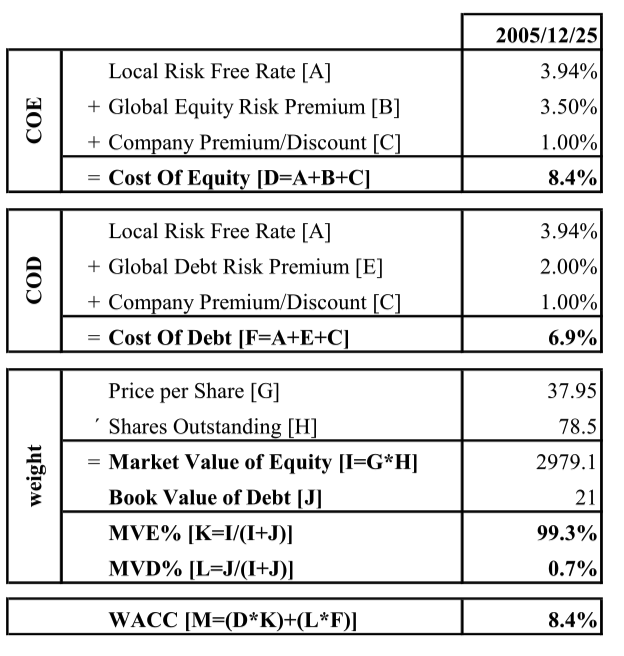

### Local risk free rate from US Treasury   

In [98]:
US10Y_df = pd.read_csv('data/US10Y.csv')
US10Y_rate_df = US10Y_df.set_index("date")["adjusted_close"]
US10Y_rate_df.rename("10Y", inplace=True)
rf_rate = US10Y_rate_df.values[-1] /100
## risk free interest rate
rf_rate


0.038809

In [99]:
US10Y_df

,date,open,high,low,close,adjusted_close,volume
0,2006-03-01,4.5539,4.5836,4.5401,4.5756,4.5756,0
1,2006-03-02,4.5846,4.6511,4.5756,4.6481,4.6481,0
2,2006-03-03,4.6422,4.6871,4.6302,4.6871,4.6871,0
3,2006-03-06,4.6871,4.7282,4.6801,4.7082,4.7082,0
4,2006-03-07,4.7434,4.7989,4.7343,4.7454,4.7454,0
...,...,...,...,...,...,...,...
4582,2023-12-25,3.8968,3.8968,3.8968,3.8968,3.8968,0
4583,2023-12-26,3.8968,3.9191,3.8781,3.9004,3.9004,0
4584,2023-12-27,3.9004,3.9040,3.7843,3.7972,3.7972,0
4585,2023-12-28,3.7972,3.8619,3.7972,3.8415,3.8415,0


### Global Risk premium from Professor Aswath Damodaran of New York University 

http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

In [100]:
df_ERP = pd.read_excel("data/global risk premium.xls", skiprows=6)
df_ERP = df_ERP.dropna(subset=["Year"]).iloc[:-1, :].set_index("Year")
ERP = df_ERP.loc[2006, 'Implied ERP (FCFE)']
ERP

0.0416

### Comopany Company-specific premium Capital Asset Pricing Model (CAPM)

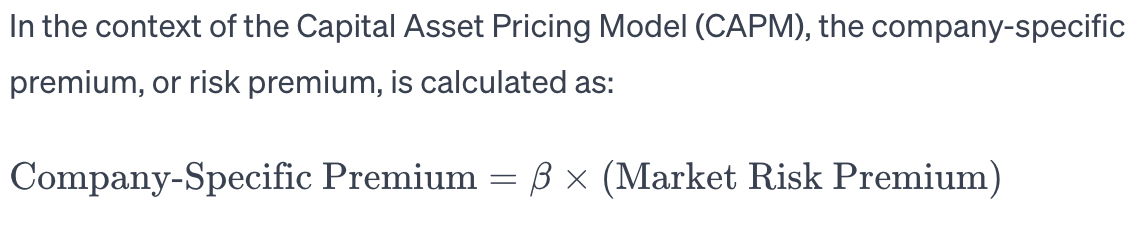

In [101]:
beta = 1.92 # from EOD dataa

In [102]:
CostOfEquity = beta*(ERP) + rf_rate
CostOfEquity

0.11868100000000001

## Cost of Debt

We can use bond yield-to-maturity (YTM) to represent, to save time I directly use the number from [gurufocus](https://www.gurufocus.com/term/wacc/TSLA/)

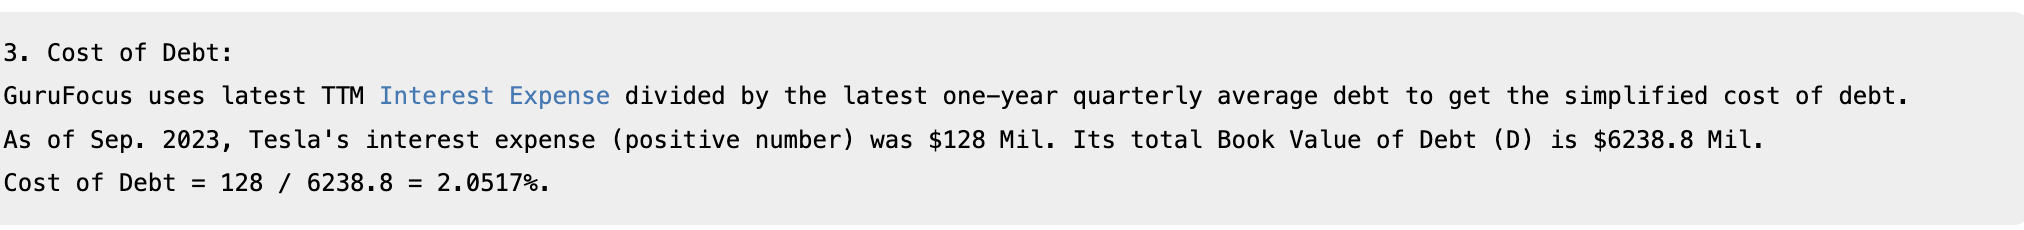

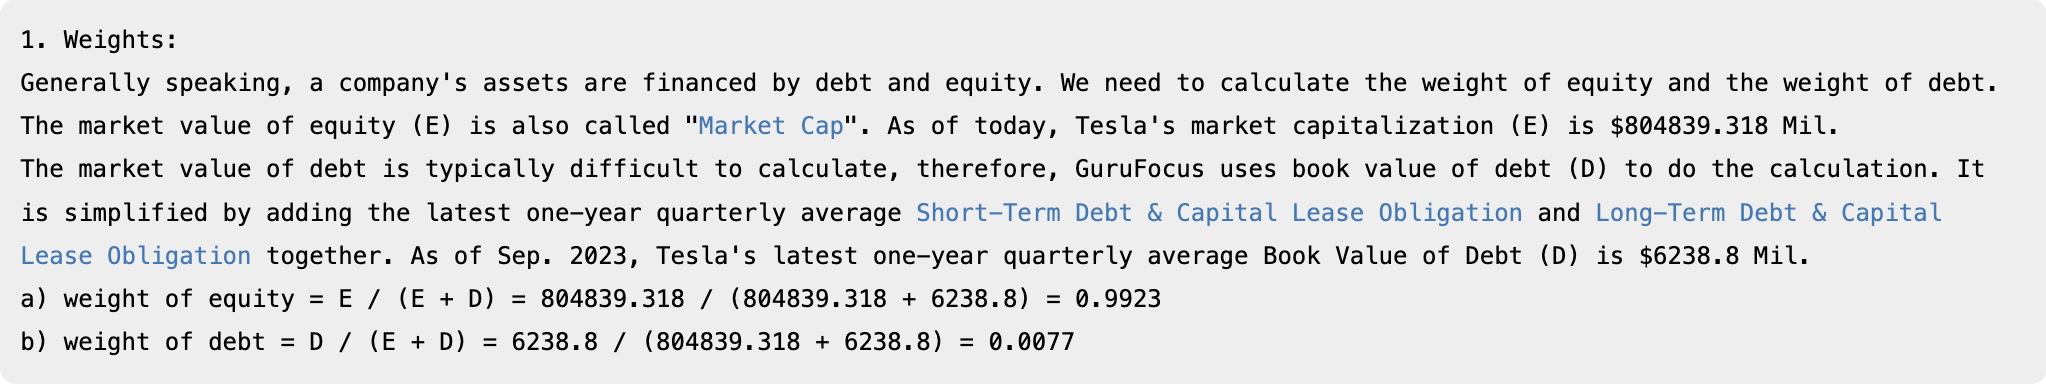

In [103]:
MVE = 0.9923 
MVD = 0.0077
CostOfDebt = 0.002

In [104]:
WACC = CostOfEquity * MVE + CostOfDebt * MVD

WACC

0.11778255630000001

In [105]:
WACC = 0.11778255630000001

## Valuation Summary

In [106]:
# compute % of sales and % of ebit variables
df["rev_growth"] = df["totalRevenue"].pct_change()
df["delta_nwc"] = df["netWorkingCapital"].diff()
df["ebit_of_sales"] = df["ebit"]/df["totalRevenue"]
df["dna_of_sales"] = df["depreciationAndAmortization"]/df["totalRevenue"]
df["capex_of_sales"] = df["capitalExpenditures"]/df["totalRevenue"]
df["nwc_of_sales"] = df["delta_nwc"]/df["totalRevenue"]
df["tax_of_ebit"] = df["taxProvision"]/df["ebit"]
df["ebiat"] = df["ebit"] - df["taxProvision"]
last_year = df.iloc[-1, :]

In [107]:
n = 10
revenue_growth_T = 0.07
ebit_perc_T = 0.23
tax_perc_T = 0.21
dna_perc_T = 0.03
capex_perc_T = 0.05
nwc_perc_T = 0.05
TGR = 0.025

In [108]:
def interpolate(initial_value, terminal_value, nyears):
    return np.linspace(initial_value, terminal_value, nyears)


In [109]:
years = range(df.index[-1]+1, df.index[-1] + n + 1)
df_proj = pd.DataFrame(index=years, columns=df.columns)
# linear interpolation
df_proj["rev_growth"] = interpolate(last_year["rev_growth"], revenue_growth_T, n) 
df_proj["ebit_of_sales"] = interpolate(last_year["ebit_of_sales"], ebit_perc_T, n) 
df_proj["dna_of_sales"] = interpolate(last_year["dna_of_sales"], dna_perc_T, n) 
df_proj["capex_of_sales"] = interpolate(last_year["capex_of_sales"], capex_perc_T, n) 
df_proj["tax_of_ebit"] = interpolate(last_year["tax_of_ebit"], tax_perc_T, n) 
df_proj["nwc_of_sales"] = interpolate(last_year["nwc_of_sales"], nwc_perc_T, n) 
# cumulative values
df_proj["totalRevenue"] = last_year["totalRevenue"] *(1+df_proj["rev_growth"]).cumprod() 
df_proj["ebit"] = last_year["ebit"] *(1+df_proj["ebit_of_sales"]).cumprod() 
df_proj["capitalExpenditures"] = last_year["capitalExpenditures"] *(1+df_proj["capex_of_sales"]).cumprod() 
df_proj["depreciationAndAmortization"] = last_year["depreciationAndAmortization"] *(1+df_proj["dna_of_sales"]).cumprod() 
df_proj["delta_nwc"] = last_year["delta_nwc"] *(1+df_proj["nwc_of_sales"]).cumprod() 
df_proj["taxProvision"] = last_year["taxProvision"] *(1+df_proj["tax_of_ebit"]).cumprod() 
df_proj["ebiat"] = df_proj["ebit"] - df_proj["taxProvision"]

In [110]:
df_proj["freeCashFlow"] = df_proj["ebiat"] + df_proj["depreciationAndAmortization"] - df_proj["capitalExpenditures"] - df_proj["delta_nwc"]


In [111]:
def calculate_present_value(cash_flows, discount_rate):
    # Calculate the present value using: PV = CF / (1 + r)^t + TV/(1 + r)^T
    present_values_cf = [cf / (1 + discount_rate) ** t for t, cf in enumerate(cash_flows, start=1)]
    return present_values_cf
df_proj["pv_FCF"] = calculate_present_value(df_proj["freeCashFlow"].values, WACC)

In [112]:
TV = df_proj["freeCashFlow"].values[-1] *(1+TGR) / (WACC - TGR)
pv_TV = TV/(1+WACC)**n

In [113]:
Assets =  last_year["totalAssets"] 
Debt = last_year["totalLiab"]
marketcap = 804838899712
total = marketcap + Debt
AfterTaxCostOfDebt = CostOfDebt * (1-tax_perc_T)
OutShares = 3178919936

In [114]:
Ent_Value = np.sum(df_proj["pv_FCF"]) + pv_TV
Cash = last_year["cash"]
Eq_Value = Ent_Value - Debt + Cash
ImpliedSharePrice = Eq_Value/OutShares

In [115]:
df.index

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')

In [116]:
df_proj[['totalRevenue', 'ebit', 'capitalExpenditures', 'depreciationAndAmortization', 'delta_nwc', 'taxProvision', 'ebiat', 'freeCashFlow', 'pv_FCF']].T

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032
totalRevenue,123294.083273,180531.747802,255444.714129,348855.145648,459232.240517,581901.647629,708662.428783,828114.020753,926891.141532,991773.521439
ebit,15945.243279,18728.736280,22127.908496,26297.344076,31434.624385,37793.310234,45700.129848,55577.821356,67975.605760,83609.995085
capitalExpenditures,7803.430409,8457.469205,9130.577893,9818.664634,10517.104705,11220.774030,11924.096073,12621.102018,13305.503782,13970.778971
depreciationAndAmortization,4391.177518,4605.956612,4820.352679,5033.333347,5243.825785,5450.724873,5652.902145,5849.215429,6038.519074,6219.674646
delta_nwc,7382.799035,7972.662281,8579.859008,9201.235775,9833.228211,10471.881468,11112.879599,11751.583925,12383.080210,13002.234221
taxProvision,1225.835970,1344.762725,1494.219319,1681.389182,1915.750516,2209.834368,2580.271825,3049.247104,3646.524806,4412.295016
ebiat,14719.407310,17383.973555,20633.689176,24615.954894,29518.873870,35583.475866,43119.858024,52528.574252,64329.080954,79197.700069
freeCashFlow,3924.355383,5559.798682,7743.604954,10629.387832,14412.366739,19341.545241,25735.784497,34005.103738,44679.016036,58444.361524
pv_FCF,3510.839708,4449.840152,5544.612572,6808.931135,8259.403155,9916.243910,11804.187954,13953.574675,16401.654114,19194.170116


In [117]:
px.bar(df_proj, x=df_proj.index, y="pv_FCF")

In [118]:
## Sensitivy Analysis

In [119]:
def Discount_Cash_Flow(df,  n, OutShares, revenue_growth_T, ebit_perc_T, tax_perc_T, dna_perc_T, capex_perc_T, nwc_perc_T, WACC,  TGR):
    # compute % of sales and % of ebit variables
    df["rev_growth"] = df["totalRevenue"].pct_change()
    df["delta_nwc"] = df["netWorkingCapital"].diff()
    df["ebit_of_sales"] = df["ebit"]/df["totalRevenue"]
    df["dna_of_sales"] = df["depreciationAndAmortization"]/df["totalRevenue"]
    df["capex_of_sales"] = df["capitalExpenditures"]/df["totalRevenue"]
    df["nwc_of_sales"] = df["delta_nwc"]/df["totalRevenue"]
    df["tax_of_ebit"] = df["taxProvision"]/df["ebit"]
    df["ebiat"] = df["ebit"] - df["taxProvision"]
    last_year = df.iloc[-1, :]

    years = range(df.index[-1]+1, df.index[-1] + n + 1)
    df_proj = pd.DataFrame(index=years, columns=df.columns)
    # linear interpolation
    df_proj["rev_growth"] = interpolate(last_year["rev_growth"], revenue_growth_T, n) 
    df_proj["ebit_of_sales"] = interpolate(last_year["ebit_of_sales"], ebit_perc_T, n) 
    df_proj["dna_of_sales"] = interpolate(last_year["dna_of_sales"], dna_perc_T, n) 
    df_proj["capex_of_sales"] = interpolate(last_year["capex_of_sales"], capex_perc_T, n) 
    df_proj["tax_of_ebit"] = interpolate(last_year["tax_of_ebit"], tax_perc_T, n) 
    df_proj["nwc_of_sales"] = interpolate(last_year["nwc_of_sales"], nwc_perc_T, n) 
    # cumulative values
    df_proj["totalRevenue"] = last_year["totalRevenue"] *(1+df_proj["rev_growth"]).cumprod() 
    df_proj["ebit"] = last_year["ebit"] *(1+df_proj["ebit_of_sales"]).cumprod() 
    df_proj["capitalExpenditures"] = last_year["capitalExpenditures"] *(1+df_proj["capex_of_sales"]).cumprod() 
    df_proj["depreciationAndAmortization"] = last_year["depreciationAndAmortization"] *(1+df_proj["dna_of_sales"]).cumprod() 
    df_proj["delta_nwc"] = last_year["delta_nwc"] *(1+df_proj["nwc_of_sales"]).cumprod() 
    df_proj["taxProvision"] = last_year["taxProvision"] *(1+df_proj["tax_of_ebit"]).cumprod() 
    df_proj["ebiat"] = df_proj["ebit"] - df_proj["taxProvision"]

    df_proj["freeCashFlow"] = df_proj["ebiat"] + df_proj["depreciationAndAmortization"] - df_proj["capitalExpenditures"] - df_proj["delta_nwc"]

    df_proj["pv_FCF"] = calculate_present_value(df_proj["freeCashFlow"].values, WACC)
    TV = df_proj["freeCashFlow"].values[-1] *(1+TGR) / (WACC - TGR)
    pv_TV = TV/(1+WACC)**n

    Assets =  last_year["totalAssets"] 
    Debt = last_year["totalLiab"]
    marketcap = 804838899712
    total = marketcap + Debt
    AfterTaxCostOfDebt = CostOfDebt * (1-tax_perc_T)    

    Ent_Value = np.sum(df_proj["pv_FCF"]) + pv_TV
    Cash = last_year["cash"]
    Eq_Value = Ent_Value - Debt + Cash
    ImpliedSharePrice = Eq_Value/OutShares
    return ImpliedSharePrice * 1_000_000

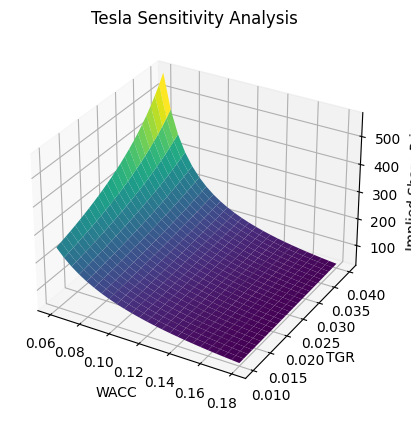

In [120]:
waccs = np.linspace(0.06, 0.18, 25)  
tgrs = np.linspace(0.01, 0.04, 25)   

# Create a meshgrid for cost of debt and growth rate
waccs_mesh, tgrs_mesh = np.meshgrid(waccs, tgrs)

# Calculate NPV for each combination of cost of debt and growth rate
dcf_results = np.zeros_like(waccs_mesh)
for i in range(len(tgrs)):
    for j in range(len(waccs)):
         dcf_results[i, j] = Discount_Cash_Flow(df,  n=10, OutShares=OutShares, revenue_growth_T = 0.07, ebit_perc_T = 0.23,  tax_perc_T = 0.21, dna_perc_T = 0.03, capex_perc_T = 0.05, nwc_perc_T = 0.05, WACC = waccs[j],  TGR = tgrs[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(waccs_mesh, tgrs_mesh, dcf_results, cmap='viridis')
ax.set_xlabel('WACC')
ax.set_ylabel('TGR')
ax.set_zlabel('Implied Share Price')
ax.set_title('Tesla Sensitivity Analysis')
plt.show()